# Aufgabe 1
https://aijobs.net
## 1)
Es werden Jobangebote von (hauptsächlich im Technologie-Bereich tätigen) Unternehmen gelistet, die mit KI und Machine Learning zu tun haben. Die Angaben zur Vergütung werden nach eigener Aussage (https://aijobs.net/salaries/) anhand von Umfragen der Anbieter und öffentlichen Angeboten ermittelt. Aufgrund von Interessenskonflikt der Arbeitgeber mit der Richtigkeit dieser Daten kann davon ausgegangen werden, dass die Vergütungen eventuell höher angegeben werden als in der Realität gezahlt wird. Außerdem wird bei einigen Stellen auf eine  geringe Anzahl der Datenpunkte (einstelliger Bereich) zurückgegriffen, was eine Ungenauigkeit mit sich ziehen kann. Aufgrund der hoher Anzahl (ca. 15 tsd.) der Jobangebote kann jedoch eine ziemlich Verlässlichkeit angenommen werden.

## 2)

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

dateiname="data_science_salaries_2024.csv"
data=pd.read_csv(dateiname)
# erste Datensätze
display(data.head())

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [2]:
#Datensätze und Attribute und nicht Null
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB
None


## kp was die mit Metadaten will

## 3)

In [3]:
print("Mittelwert gesamt in USD:", data["salary_in_usd"].mean(), "\nMedian gesamt in USD:", data["salary_in_usd"].median())

Mittelwert gesamt in USD: 145560.55856948023 
Median gesamt in USD: 138666.0


In [4]:
for x in data['experience_level'].unique():
    y= data[data['experience_level']==x]
    print(f'{x}: \nMittel {y['salary_in_usd'].mean()}; Median {y['salary_in_usd'].median()}')
    # (print[(f"{x}: ]

Mid-level: 
Mittel 119019.81253731344; Median 106500.0
Senior-level: 
Mittel 162071.06358099877; Median 153600.0
Entry-level: 
Mittel 84448.9168141593; Median 75000.0
Executive-level: 
Mittel 189687.3464566929; Median 184560.0


## 4)

In [5]:
print(f'Mittel alle Währungen: {data['salary'].mean()}, {data['salary_in_usd'].mean()}')

Mittel alle Währungen: 179283.25549325655, 145560.55856948023


In [6]:
print(data['salary_currency'].unique())

['USD' 'GBP' 'EUR' 'TRY' 'THB' 'ZAR' 'SGD' 'INR' 'PLN' 'PHP' 'NOK' 'ILS'
 'HKD' 'AUD' 'CHF' 'CAD' 'BRL' 'JPY' 'HUF' 'DKK' 'CLP' 'MXN']


In [7]:
ypoints = data['salary'].to_list()
xpoints = range(np.size(ypoints))

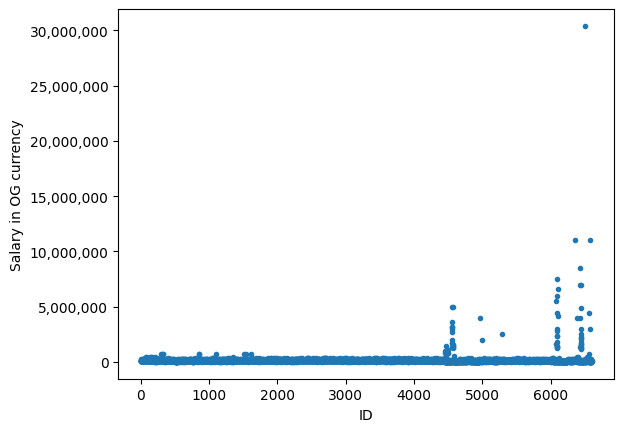

In [8]:
plt.scatter(xpoints, ypoints, marker=".")
plt.xlabel("ID")
plt.ylabel("Salary in OG currency")
gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

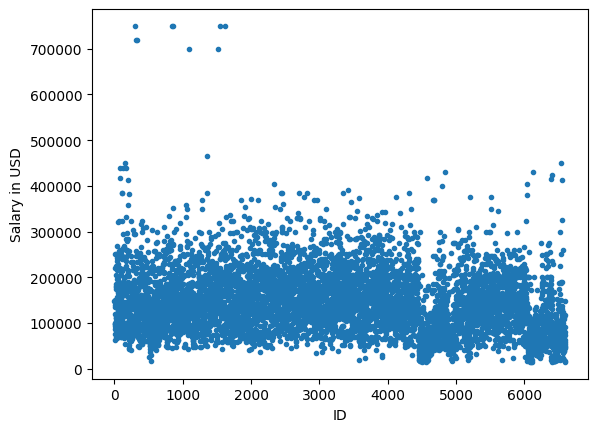

In [9]:
ypoints = data['salary_in_usd'].to_list()
xpoints = range(np.size(ypoints))
plt.scatter(xpoints, ypoints, marker=".")
plt.xlabel("ID")
plt.ylabel("Salary in USD")
plt.show()

Außerdem existieren in dem Datensatz 22 verschiedene Währungen, wobei manche dieser ca. 10-mal weniger wert sind als USD und manche sogar 1000-fach weniger (Chilenischer Peso).